<a href="https://colab.research.google.com/github/JcaHernandez99/Ploxpot/blob/main/Devolucion_Productos_Falabella_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

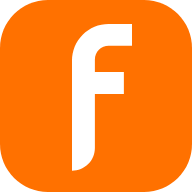


---


En la tienda de Falabella se han estado presentando devoluciones de los productos de forma constante, y no se sabe porque y tampoco en que sucursal sucede esto, por lo tanto se requiere identificar donde están sucediendo en gran medida las devoluciones de los productos y también predecir que probabilidad hay de que haya otra devolución de productos el próximo mes.



---



# **Entendimiento de la Base de Datos**

* TRN_TECH_KEY = Identidicador

* CAUTORIZA_VENTA = Identificador de si hubo devolucion

* MEDIO_PAGO_SRX = Medio de pago

* FRANQUICIA_SRX = Franquicia banco

* NCUENTA = #Cuenta

* MONTO_SRX = Monto

* F12 = Identificador envio producto

* NOMBRE_CLIENTE = Nombre  cliente

* LOCAL_V = Sucursal en local o web

* PENULTIMO = Proceso de envio

* ESTADO_F12 = Culminacion de proceso de envio

* SUBESTADO_F12 = Detalle proceso de envio

* TERMINAL = TERMINAL

* SECUENCIA = SECUENCIA

* FECHA_COMPRA = Fecha que se realizo la compra

* MT = Detalle culmonacion compra

* TOTAL_PRD = TOTAL_PRD

* SKU_V = SKU_V

* DESC_SKU = Detalle Producto

* DESC_LINEA = Seccion Producto

* DESC_SLINEA = Detalle Seccion Producto

* PROVEEDOR = PROVEEDOR

* CAUTORIZA_NC = Contador devoluciones

* MEDIO_PAGO_NC = MEDIO_PAGO_NC

* CREACION_NC = CREACION_NC

* ESTADO_NC = ESTADO_NC

* RAZON_NC = RAZON_NC

* LOCAL_V_NC = LOCAL_V_NC

* TERMINAL_NC = TERMINAL_NC

* SECUENCIA_NC = SECUENCIA_NC

* MONTO_NC = MONTO_NC

* SKU_NC = SKU_NC

* MONTO_SKU_NC	= MONTO_SKU_NC

* QCANTIDAD = QCANTIDAD

# **Implementación codigo**

In [239]:
# @title Para la base de datos se esta usando el tipo de Parquet, son un tipo de formato de archivo de almacenamiento de datos columnar y abierto, utilizado para almacenar datos en entornos de big data y sistemas de almacenamiento distribuidos, este tipo de formatos estan mas optimizados y permiten agilizar la analitica de datos masivos

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 6000
from google.colab import files

uploaded = files.upload()


for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  Test_ventas = pd.read_parquet(fn, engine='auto')
  Test_ventas

Saving TEST_VENTAS_OCT.parquet to TEST_VENTAS_OCT (17).parquet
User uploaded file "TEST_VENTAS_OCT (17).parquet" with length 5543444 bytes


In [119]:
#Se evalua las cantidades de cada base de datos
print(Test_ventas.shape)

(90754, 36)


In [120]:
#Se analiza la informacion que contiene cada columna, como el tipo de dato
Test_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90754 entries, 0 to 90753
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TRN_TECH_KEY     90754 non-null  int64         
 1   CAUTORIZA_VENTA  90609 non-null  object        
 2   MEDIO_PAGO_SRX   90754 non-null  object        
 3   FRANQUICIA_SRX   90612 non-null  object        
 4   NCUENTA          90612 non-null  float64       
 5   MONTO_SRX        90612 non-null  float64       
 6   F12              90754 non-null  int64         
 7   NOMBRE_CLIENTE   90754 non-null  object        
 8   LOCAL_V          90754 non-null  object        
 9   PENULTIMO        90754 non-null  object        
 10  ESTADO_F12       90754 non-null  object        
 11  SUBESTADO_F12    90753 non-null  object        
 12  TERMINAL         90745 non-null  float64       
 13  SECUENCIA        90745 non-null  float64       
 14  FECHA_COMPRA     90754 non-null  datet

In [121]:
#Descripcion de los datos, para saber si estan en orden o ver datos desorbitados
Test_ventas.describe()

,TRN_TECH_KEY,NCUENTA,MONTO_SRX,F12,TERMINAL,SECUENCIA,FECHA_COMPRA,TOTAL_PRD,CAUTORIZA_NC,CREACION_NC,TERMINAL_NC,SECUENCIA_NC,MONTO_NC,MONTO_SKU_NC,QCANTIDAD
count,9.075400e+04,9.061200e+04,9.061200e+04,9.075400e+04,90745.000000,90745.000000,90754,9.075400e+04,2.713000e+03,2713,2712.000000,2712.000000,2.678000e+03,2.713000e+03,2713.000000
mean,2.409718e+08,7.632579e+13,5.499248e+05,1.269835e+10,2851.367954,50816.213676,2022-10-06 22:44:52.671463,2.990253e+05,1.081724e+09,2022-10-08 20:23:58.407666,514.533186,5879.826696,4.393313e+05,2.418041e+05,1.036491
min,2.405643e+08,0.000000e+00,1.000000e+00,1.217671e+09,1.000000,2.000000,2022-10-01 00:00:00,0.000000e+00,1.081537e+09,2022-10-01 00:00:00,1.000000,5.000000,7.270000e+03,0.000000e+00,1.000000
25%,2.408061e+08,3.042000e+03,1.000000e+05,1.270482e+10,3461.000000,41459.000000,2022-10-04 00:00:00,3.499000e+04,1.081673e+09,2022-10-07 00:00:00,22.000000,2615.250000,8.992000e+04,5.600000e+04,1.000000
50%,2.409650e+08,7.104000e+03,2.018820e+05,1.270506e+10,3462.000000,49309.000000,2022-10-07 00:00:00,7.999000e+04,1.081732e+09,2022-10-09 00:00:00,58.000000,5524.000000,1.695100e+05,9.599400e+04,1.000000
75%,2.411711e+08,9.999000e+03,4.685500e+05,1.270528e+10,3463.000000,67329.000000,2022-10-10 00:00:00,1.828625e+05,1.081783e+09,2022-10-11 00:00:00,96.000000,9133.250000,3.234250e+05,1.799000e+05,1.000000
max,2.413299e+08,4.000010e+15,2.205269e+07,1.270553e+10,3464.000000,93189.000000,2022-10-13 21:50:29,2.999850e+07,1.081826e+09,2022-10-14 00:00:00,3001.000000,12025.000000,1.166970e+07,7.699900e+06,9.000000
std,2.106937e+05,5.472485e+14,1.073541e+06,2.775248e+08,1311.487374,26485.305700,NaN,7.682111e+05,6.710605e+04,NaN,1072.609158,3597.967638,9.353671e+05,5.781501e+05,0.306870


In [122]:
#Evidenciar datos faltantes por parte de la base de datos, los que estan en 0 es porque no hubo perdida de datos,
#Mientras en los que si dan valores numericos es la cantidad de ceros que tiene dentro de esa base de datos.
print('Datos faltantes Test ventas')
print(pd.isnull(Test_ventas).sum())

Datos faltantes Test ventas
TRN_TECH_KEY           0
CAUTORIZA_VENTA      145
MEDIO_PAGO_SRX         0
FRANQUICIA_SRX       142
NCUENTA              142
MONTO_SRX            142
F12                    0
NOMBRE_CLIENTE         0
LOCAL_V                0
PENULTIMO              0
ESTADO_F12             0
SUBESTADO_F12          1
TERMINAL               9
SECUENCIA              9
FECHA_COMPRA           0
MT                  8969
TOTAL_PRD              0
SKU_V                  0
DESC_SKU               0
DESC_LINEA             0
DESC_SLINEA            0
DESC_CLASE             0
DESC_SCLASE            0
PROVEEDOR              0
CAUTORIZA_NC       88041
MEDIO_PAGO_NC      88121
CREACION_NC        88041
ESTADO_NC          88041
RAZON_NC           88060
LOCAL_V_NC         88041
TERMINAL_NC        88042
SECUENCIA_NC       88042
MONTO_NC           88076
SKU_NC             88041
MONTO_SKU_NC       88041
QCANTIDAD          88041
dtype: int64


In [123]:
Test_ventas.info

<bound method DataFrame.info of        TRN_TECH_KEY CAUTORIZA_VENTA   MEDIO_PAGO_SRX FRANQUICIA_SRX  \
0         240564334            6429  TARJETA EXTERNA          Otros   
1         240564334            6429  TARJETA EXTERNA          Otros   
2         240564334            6429  TARJETA EXTERNA          Otros   
3         240565870               0             GIFT          Otros   
4         240565870               0             GIFT          Otros   
...             ...             ...              ...            ...   
90749     241329883          184094  TARJETA INTERNA      Otros CMR   
90750     241329884          564431  TARJETA EXTERNA          Otros   
90751     241329884          564431  TARJETA EXTERNA          Otros   
90752     241329904          180422  TARJETA EXTERNA          Otros   
90753     241329904          180422  TARJETA EXTERNA          Otros   

            NCUENTA  MONTO_SRX          F12                 NOMBRE_CLIENTE  \
0      8.447000e+03   113940.0  12704638106               CAROLINA GIRALDO   
1      8.447000e+03   113940.0  12704638106               CAROLINA GIRALDO   
2      8.447000e+03   113940.0  12704638106               CAROLINA GIRALDO   
3      1.246280e+09   437000.0  12704657657             LISANDRO RODRIGUEZ   
4      1.246280e+09   437000.0  12704657657             LISANDRO RODRIGUEZ   
...             ...        ...          ...                            ...   
90749  1.235000e+03    49890.0  12705499270  CARLOS ALBERTO FRANCO CUARTAS   
90750  9.903000e+03    77900.0  12705499751             ANDRÉS VÉLEZ OCHOA   
90751  9.903000e+03    77900.0  12705499751             ANDRÉS VÉLEZ OCHOA   
90752  5.938000e+03  2399900.0  12705494770              BLANCA COLON MORA   
90753  5.938000e+03  2399900.0  12705494770              BLANCA COLON MORA   

                      LOCAL_V        PENULTIMO       ESTADO_F12  \
0                   SAN DIEGO  TOTAL ENTREGA    TOTAL ENTREGA     
1                   SAN DIEGO  TOTAL ENTREGA    TOTAL ENTREGA     
2                   SAN DIEGO  TOTAL ENTREGA    TOTAL ENTREGA     
3                    GALERIAS  EN RUTA          TOTAL ENTREGA     
4                    GALERIAS  EN RUTA          TOTAL ENTREGA     
...                       ...              ...              ...   
90749  FALABELLA. COM ALTERNO  CONFIRMADO       DIGITADO          
90750  FALABELLA. COM ALTERNO  DIGITADO         DIGITADO          
90751  FALABELLA. COM ALTERNO  DIGITADO         DIGITADO          
90752  FALABELLA. COM ALTERNO  DIGITADO         EN RUTA           
90753  FALABELLA. COM ALTERNO  DIGITADO         EN RUTA           

             SUBESTADO_F12  TERMINAL  SECUENCIA        FECHA_COMPRA  \
0           ENTREGA EN SRX       2.0     8663.0 2022-10-01 00:00:00   
1           ENTREGA EN SRX       2.0     8663.0 2022-10-01 00:00:00   
2           ENTREGA EN SRX       2.0     8663.0 2022-10-01 00:00:00   
3          ENTREGA POR PDA       8.0     8094.0 2022-10-01 20:28:36   
4          ENTREGA POR PDA       8.0     8094.0 2022-10-01 20:28:36   
...                    ...       ...        ...                 ...   
90749  BOLETEADO/FACTURADO      20.0     7911.0 2022-10-13 21:49:39   
90750  BOLETEADO/FACTURADO      20.0     7912.0 2022-10-13 21:50:29   
90751  BOLETEADO/FACTURADO      20.0     7912.0 2022-10-13 21:50:29   
90752              EN RUTA      75.0     6088.0 2022-10-13 15:51:54   
90753              EN RUTA      75.0     6088.0 2022-10-13 15:51:54   

                                  MT  TOTAL_PRD      SKU_V  \
0           RETIRADO DESDE PROVEEDOR          1    8694077   
1           RETIRADO DESDE PROVEEDOR       5576     950998   
2           RETIRADO DESDE PROVEEDOR     108363    9155691   
3      SIN PROBLEMA ENTREGA EN LINEA          1   36572858   
4      SIN PROBLEMA ENTREGA EN LINEA      29846     951019   
...                              ...        ...        ...   
90749                           None      29990   20621566   
90750                   

In [124]:
pd.unique(Test_ventas['MEDIO_PAGO_SRX'])

array(['TARJETA EXTERNA', 'GIFT', 'TARJETA INTERNA', 'CONVENIO',
       'EFECTIVO', 'QUICKPAY', 'RECAUDACION A TERCEROS',
       'TARJETA DEVOLUCION EVENTO', 'FACTXCOBRAR'], dtype=object)

In [125]:
pd.unique(Test_ventas['PENULTIMO'])

array(['TOTAL ENTREGA  ', 'EN RUTA        ', 'DIGITADO       ',
       'CONFIRMADO     ', 'RESERVADO      '], dtype=object)

In [126]:
pd.unique(Test_ventas['ESTADO_F12'])

array(['TOTAL ENTREGA  ', 'ANULADO X NCRD ', 'EN RUTA        ',
       'DIGITADO       ', 'ANULADO X FALTA'], dtype=object)

In [240]:
Test_ventas['FECHA_COMPRA']=pd.to_datetime(Test_ventas['FECHA_COMPRA'])
#Test_ventas.fillna(0)

In [241]:
Test_ventas['FECHA_COMPRA'] = Test_ventas['FECHA_COMPRA'].dt.day
Test_ventas['CREACION_NC'] = Test_ventas['CREACION_NC'].dt.day
#Test_ventas.fillna(0)

In [242]:
import pandas as pd

# Asumimos que Test_ventas ya es un DataFrame cargado.

# Crear variables dummies para cada columna categórica
local_dummies = pd.get_dummies(Test_ventas['LOCAL_V'], prefix='LOCAL_V')
#f12_dummies = pd.get_dummies(Test_ventas['F12'], prefix='F12')
estado_f12_dummies = pd.get_dummies(Test_ventas['ESTADO_F12'], prefix='ESTADO_F12')
franquicia_srx_dummies = pd.get_dummies(Test_ventas['FRANQUICIA_SRX'], prefix='FRANQUICIA_SRX')
subestado_f12_dummies = pd.get_dummies(Test_ventas['SUBESTADO_F12'], prefix='SUBESTADO_F12')

# Unir todas las columnas dummies al DataFrame original
Test_ventas = pd.concat([Test_ventas, local_dummies, estado_f12_dummies, franquicia_srx_dummies, subestado_f12_dummies], axis=1)

# Eliminar las columnas originales categóricas
Test_ventas.drop(['F12', 'ESTADO_F12', 'FRANQUICIA_SRX', 'LOCAL_V', 'SUBESTADO_F12'], axis=1, inplace=True)

Test_ventas

,TRN_TECH_KEY,CAUTORIZA_VENTA,MEDIO_PAGO_SRX,NCUENTA,MONTO_SRX,NOMBRE_CLIENTE,PENULTIMO,TERMINAL,SECUENCIA,FECHA_COMPRA,MT,TOTAL_PRD,SKU_V,DESC_SKU,DESC_LINEA,DESC_SLINEA,DESC_CLASE,DESC_SCLASE,PROVEEDOR,CAUTORIZA_NC,MEDIO_PAGO_NC,CREACION_NC,ESTADO_NC,RAZON_NC,LOCAL_V_NC,TERMINAL_NC,SECUENCIA_NC,MONTO_NC,SKU_NC,MONTO_SKU_NC,QCANTIDAD,LOCAL_V_ACQUA,LOCAL_V_ARKADIA,LOCAL_V_BUENAVISTA,LOCAL_V_CACIQUE,LOCAL_V_CARACOLI,LOCAL_V_CENTRO MAYOR,LOCAL_V_COLINA,LOCAL_V_DIVER PLAZA,LOCAL_V_EL CASTILLO,LOCAL_V_FALABELLA. COM ALTERNO,LOCAL_V_FONTANAR,LOCAL_V_GALERIAS,LOCAL_V_HAYUELOS,LOCAL_V_JARDIN PLAZA,LOCAL_V_LA CAROLA,LOCAL_V_LA FELICIDAD,LOCAL_V_PARQUE ARBOLEDA,LOCAL_V_PLAZA CENTRAL,LOCAL_V_PRIMAVERA,LOCAL_V_SAN DIEGO,LOCAL_V_SANTA FE,LOCAL_V_SANTAFE MEDELLIN,LOCAL_V_SUBA,LOCAL_V_TIENDA ALEGRA,LOCAL_V_TIENDA FALABELLA .COM,LOCAL_V_TITAN,LOCAL_V_UNICENTRO,LOCAL_V_VENTA EMPRESA,LOCAL_V_WTC CALI,ESTADO_F12_ANULADO X FALTA,ESTADO_F12_ANULADO X NCRD,ESTADO_F12_DIGITADO,ESTADO_F12_EN RUTA,ESTADO_F12_TOTAL ENTREGA,FRANQUICIA_SRX_AMEX,FRANQUICIA_SRX_DINNERS,FRANQUICIA_SRX_MASTERCARD,FRANQUICIA_SRX_Otros,FRANQUICIA_SRX_Otros CMR,FRANQUICIA_SRX_VISA,FRANQUICIA_SRX_VISA DEBIT,SUBESTADO_F12_ANULADO X FALTA,SUBESTADO_F12_ANULADO X NCRD,SUBESTADO_F12_BOLETEADO/FACTURADO,SUBESTADO_F12_EN LINEA PRV. CON FACTURA,SUBESTADO_F12_EN RUTA,SUBESTADO_F12_EN RUTA AL CLIENTE,SUBESTADO_F12_EN RUTA CLIENTE DIRECTO/PROV,SUBESTADO_F12_EN TRANSITO,SUBESTADO_F12_ENTREGA ADMINISTRATIVO,SUBESTADO_F12_ENTREGA EN SRX,SUBESTADO_F12_ENTREGA EN TIENDA,SUBESTADO_F12_ENTREGA POR PDA,SUBESTADO_F12_MT,SUBESTADO_F12_MT PROVEEDOR,SUBESTADO_F12_PREPARADO PARA RETIRO,SUBESTADO_F12_RETIRADO DESDE PROVEEDOR
0,240564334,6429,TARJETA EXTERNA,8.447000e+03,113940.0,CAROLINA GIRALDO,TOTAL ENTREGA,2.0,8663.0,1,RETIRADO DESDE PROVEEDOR,1,8694077,VENTA WS 1052,ADMINISTRACION,PROMOCIONES,PROMOCIONES,PROMOCIONES,X,NaN,None,NaN,None,None,None,NaN,NaN,NaN,None,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,240564334,6429,TARJETA EXTERNA,8.447000e+03,113940.0,CAROLINA GIRALDO,TOTAL ENTREGA,2.0,8663.0,1,RETIRADO DESDE PROVEEDOR,5576,950998,DESPACHO,ADMINISTRACION,RECUPERACION,DESPACHO,CATALOGO,X,NaN,None,NaN,None,None,None,NaN,NaN,NaN,None,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,240564334,6429,TARJETA EXTERNA,8.447000e+03,113940.0,CAROLINA GIRALDO,TOTAL ENTREGA,2.0,8663.0,1,RETIRADO DESDE PROVEEDOR,108363,9155691,GLOW PLAY BLUSH THAT S P 7 3GM,PERFUMERIA,PERFUMERIA SELECTIVA,MAQUILLAJE,MQ ROSTRO,ELCA COSMETICOS COLOMBIA S.A.S.,NaN,None,NaN,None,None,None,NaN,NaN,NaN,None,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,240565870,0,GIFT,1.246280e+09,437000.0,LISANDRO RODRIGUEZ,EN RUTA,8.0,8094.0,1,SIN PROBLEMA ENTREGA EN LINEA,1,36572858,Promotor LG 47,CMR PUNTOS,2500 PUNTOS,2K ELECTRO,2K ELECTRODOMESTICOS,X,NaN,None,NaN,None,None,None,NaN,NaN,NaN,None,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,Fal

Categorizacion Dummies

In [243]:
Test_ventas.drop(['TRN_TECH_KEY', 'MEDIO_PAGO_SRX', 'NCUENTA', 'NOMBRE_CLIENTE','PENULTIMO','MT','DESC_SKU','DESC_LINEA','DESC_SLINEA','DESC_CLASE','DESC_SCLASE','PROVEEDOR'], axis=1, inplace=True)
Test_ventas.fillna(0)

,CAUTORIZA_VENTA,MONTO_SRX,TERMINAL,SECUENCIA,FECHA_COMPRA,TOTAL_PRD,SKU_V,CAUTORIZA_NC,MEDIO_PAGO_NC,CREACION_NC,ESTADO_NC,RAZON_NC,LOCAL_V_NC,TERMINAL_NC,SECUENCIA_NC,MONTO_NC,SKU_NC,MONTO_SKU_NC,QCANTIDAD,LOCAL_V_ACQUA,LOCAL_V_ARKADIA,LOCAL_V_BUENAVISTA,LOCAL_V_CACIQUE,LOCAL_V_CARACOLI,LOCAL_V_CENTRO MAYOR,LOCAL_V_COLINA,LOCAL_V_DIVER PLAZA,LOCAL_V_EL CASTILLO,LOCAL_V_FALABELLA. COM ALTERNO,LOCAL_V_FONTANAR,LOCAL_V_GALERIAS,LOCAL_V_HAYUELOS,LOCAL_V_JARDIN PLAZA,LOCAL_V_LA CAROLA,LOCAL_V_LA FELICIDAD,LOCAL_V_PARQUE ARBOLEDA,LOCAL_V_PLAZA CENTRAL,LOCAL_V_PRIMAVERA,LOCAL_V_SAN DIEGO,LOCAL_V_SANTA FE,LOCAL_V_SANTAFE MEDELLIN,LOCAL_V_SUBA,LOCAL_V_TIENDA ALEGRA,LOCAL_V_TIENDA FALABELLA .COM,LOCAL_V_TITAN,LOCAL_V_UNICENTRO,LOCAL_V_VENTA EMPRESA,LOCAL_V_WTC CALI,ESTADO_F12_ANULADO X FALTA,ESTADO_F12_ANULADO X NCRD,ESTADO_F12_DIGITADO,ESTADO_F12_EN RUTA,ESTADO_F12_TOTAL ENTREGA,FRANQUICIA_SRX_AMEX,FRANQUICIA_SRX_DINNERS,FRANQUICIA_SRX_MASTERCARD,FRANQUICIA_SRX_Otros,FRANQUICIA_SRX_Otros CMR,FRANQUICIA_SRX_VISA,FRANQUICIA_SRX_VISA DEBIT,SUBESTADO_F12_ANULADO X FALTA,SUBESTADO_F12_ANULADO X NCRD,SUBESTADO_F12_BOLETEADO/FACTURADO,SUBESTADO_F12_EN LINEA PRV. CON FACTURA,SUBESTADO_F12_EN RUTA,SUBESTADO_F12_EN RUTA AL CLIENTE,SUBESTADO_F12_EN RUTA CLIENTE DIRECTO/PROV,SUBESTADO_F12_EN TRANSITO,SUBESTADO_F12_ENTREGA ADMINISTRATIVO,SUBESTADO_F12_ENTREGA EN SRX,SUBESTADO_F12_ENTREGA EN TIENDA,SUBESTADO_F12_ENTREGA POR PDA,SUBESTADO_F12_MT,SUBESTADO_F12_MT PROVEEDOR,SUBESTADO_F12_PREPARADO PARA RETIRO,SUBESTADO_F12_RETIRADO DESDE PROVEEDOR
0,6429,113940.0,2.0,8663.0,1,1,8694077,0.0,0,0.0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,6429,113940.0,2.0,8663.0,1,5576,950998,0.0,0,0.0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,6429,113940.0,2.0,8663.0,1,108363,9155691,0.0,0,0.0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,0,437000.0,8.0,8094.0,1,1,36572858,0.0,0,0.0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,0,437000.0,8.0,8094.0,1,29846,951019,0.0,0,0.0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90749,184094,49890.0,20.0,7911.0,13,29990,20621566,0.0,0,0.0,0

In [244]:
# Establecer un umbral
umbral = 1.08175e+09  # Este es un ejemplo, puedes ajustarlo según sea necesario

# Convertir los valores en dos clases
Test_ventas['CAUTORIZA_NC_CLASIFICADOR'] = Test_ventas['CAUTORIZA_NC'].apply(lambda x: 1 if x > umbral else 0)

# Verificar la distribución de clases en la nueva columna
distribucion_clases = Test_ventas['CAUTORIZA_NC_CLASIFICADOR'].value_counts()
print(distribucion_clases)


CAUTORIZA_NC_CLASIFICADOR
0    89580
1     1174
Name: count, dtype: int64


In [245]:
Test_ventas.drop(['CAUTORIZA_NC','CAUTORIZA_VENTA','SKU_V','MEDIO_PAGO_NC','ESTADO_NC','RAZON_NC','LOCAL_V_NC','SKU_NC'], axis=1, inplace=True)

In [246]:
import numpy as np
# Assuming you want to replace 1.0 with 1 and NaN with 0
#Test_ventas['CAUTORIZA_NC_CALSIFICADOR'] = Test_ventas['CAUTORIZA_NC_CALSIFICADOR'].map({1.0: 1, np.nan: 0})
Test_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90754 entries, 0 to 90753
Data columns (total 69 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   MONTO_SRX                                   90612 non-null  float64
 1   TERMINAL                                    90745 non-null  float64
 2   SECUENCIA                                   90745 non-null  float64
 3   FECHA_COMPRA                                90754 non-null  int32  
 4   TOTAL_PRD                                   90754 non-null  int64  
 5   CREACION_NC                                 2713 non-null   float64
 6   TERMINAL_NC                                 2712 non-null   float64
 7   SECUENCIA_NC                                2712 non-null   float64
 8   MONTO_NC                                    2678 non-null   float64
 9   MONTO_SKU_NC                                2713 non-null   float64
 10  QCANTIDAD 

In [247]:
import pandas as pd

# Asegúrate de que Test_ventas está cargado
# Test_ventas = pd.read_csv('ruta_a_tu_archivo.csv')  # Si es necesario cargar desde un archivo

# Verificar la distribución de clases en la columna 'CAUTORIZA_NC'
print("Distribución de clases en 'CAUTORIZA_NC_CLASIFICADOR':")
print(Test_ventas['CAUTORIZA_NC_CLASIFICADOR'].value_counts())

Distribución de clases en 'CAUTORIZA_NC_CLASIFICADOR':
CAUTORIZA_NC_CLASIFICADOR
0    89580
1     1174
Name: count, dtype: int64


In [248]:
# Mostrar los valores únicos en la columna 'CAUTORIZA_NC'
unique_values = Test_ventas['CAUTORIZA_NC_CLASIFICADOR'].unique()
print(unique_values)


[0 1]


In [249]:
# Eliminar filas con valores faltantes en la columna CAUTORIZA_NC_CALSIFICADOR
Test_ventas.dropna(subset=['CAUTORIZA_NC_CLASIFICADOR'], inplace=True)
Test_ventas

,MONTO_SRX,TERMINAL,SECUENCIA,FECHA_COMPRA,TOTAL_PRD,CREACION_NC,TERMINAL_NC,SECUENCIA_NC,MONTO_NC,MONTO_SKU_NC,QCANTIDAD,LOCAL_V_ACQUA,LOCAL_V_ARKADIA,LOCAL_V_BUENAVISTA,LOCAL_V_CACIQUE,LOCAL_V_CARACOLI,LOCAL_V_CENTRO MAYOR,LOCAL_V_COLINA,LOCAL_V_DIVER PLAZA,LOCAL_V_EL CASTILLO,LOCAL_V_FALABELLA. COM ALTERNO,LOCAL_V_FONTANAR,LOCAL_V_GALERIAS,LOCAL_V_HAYUELOS,LOCAL_V_JARDIN PLAZA,LOCAL_V_LA CAROLA,LOCAL_V_LA FELICIDAD,LOCAL_V_PARQUE ARBOLEDA,LOCAL_V_PLAZA CENTRAL,LOCAL_V_PRIMAVERA,LOCAL_V_SAN DIEGO,LOCAL_V_SANTA FE,LOCAL_V_SANTAFE MEDELLIN,LOCAL_V_SUBA,LOCAL_V_TIENDA ALEGRA,LOCAL_V_TIENDA FALABELLA .COM,LOCAL_V_TITAN,LOCAL_V_UNICENTRO,LOCAL_V_VENTA EMPRESA,LOCAL_V_WTC CALI,ESTADO_F12_ANULADO X FALTA,ESTADO_F12_ANULADO X NCRD,ESTADO_F12_DIGITADO,ESTADO_F12_EN RUTA,ESTADO_F12_TOTAL ENTREGA,FRANQUICIA_SRX_AMEX,FRANQUICIA_SRX_DINNERS,FRANQUICIA_SRX_MASTERCARD,FRANQUICIA_SRX_Otros,FRANQUICIA_SRX_Otros CMR,FRANQUICIA_SRX_VISA,FRANQUICIA_SRX_VISA DEBIT,SUBESTADO_F12_ANULADO X FALTA,SUBESTADO_F12_ANULADO X NCRD,SUBESTADO_F12_BOLETEADO/FACTURADO,SUBESTADO_F12_EN LINEA PRV. CON FACTURA,SUBESTADO_F12_EN RUTA,SUBESTADO_F12_EN RUTA AL CLIENTE,SUBESTADO_F12_EN RUTA CLIENTE DIRECTO/PROV,SUBESTADO_F12_EN TRANSITO,SUBESTADO_F12_ENTREGA ADMINISTRATIVO,SUBESTADO_F12_ENTREGA EN SRX,SUBESTADO_F12_ENTREGA EN TIENDA,SUBESTADO_F12_ENTREGA POR PDA,SUBESTADO_F12_MT,SUBESTADO_F12_MT PROVEEDOR,SUBESTADO_F12_PREPARADO PARA RETIRO,SUBESTADO_F12_RETIRADO DESDE PROVEEDOR,CAUTORIZA_NC_CLASIFICADOR
0,113940.0,2.0,8663.0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,0
1,113940.0,2.0,8663.0,1,5576,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,0
2,113940.0,2.0,8663.0,1,108363,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,0
3,437000.0,8.0,8094.0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,0
4,437000.0,8.0,8094.0,1,29846,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90749,49890.0,20.0,7911.0,13,29990,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,F

In [250]:
Test_ventas.drop(['MONTO_SRX','TERMINAL_NC','SECUENCIA_NC','MONTO_NC'], axis=1, inplace=True)

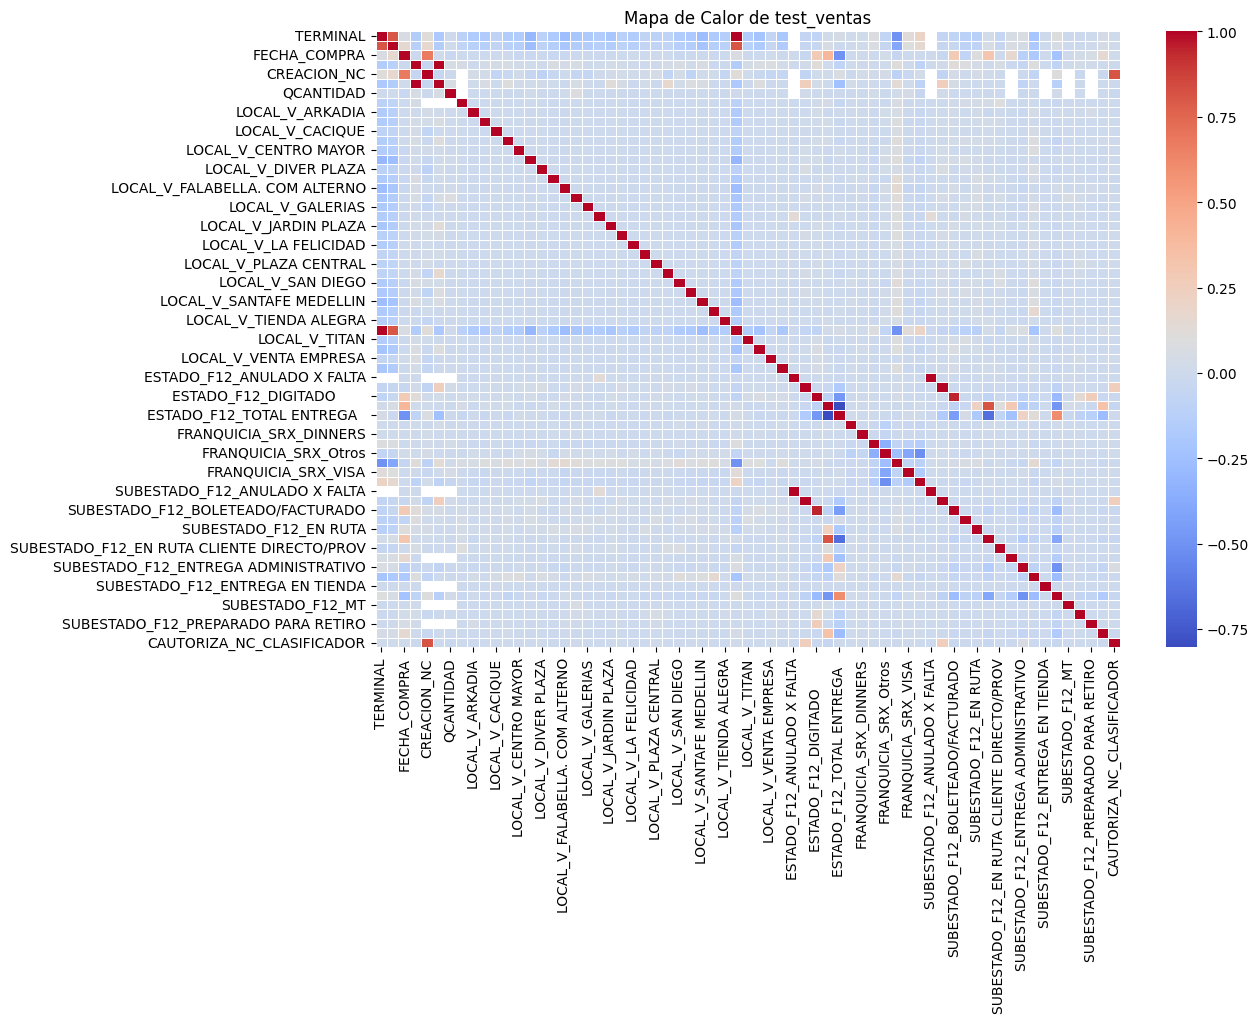

In [281]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el mapa de calor sin mostrar los valores numéricos
plt.figure(figsize=(12, 8))
sns.heatmap(Test_ventas.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de test_ventas')
plt.show()



In [259]:
import pandas as pd

# Check for missing values in X
#missing_values = X.isnull().sum()

# Print the number of missing values in each column
#print(missing_values)

In [253]:
from sklearn.impute import SimpleImputer

# Crear el imputador
imputer = SimpleImputer(strategy='mean')  # También puedes probar 'median' u otras estrategias

# Aplicar la imputación a tus datos
X_imputed = imputer.fit_transform(X)


In [260]:
# Eliminar las muestras con valores faltantes
#X_clean = X.dropna()
#y_clean = y[X.index.isin(X_clean.index)]


In [255]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Eliminar filas con valores NaN en la variable objetivo
data_cleaned = Test_ventas.dropna(subset=['CAUTORIZA_NC_CLASIFICADOR'])

# Imputar o eliminar valores NaN en características de entrada
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(data_cleaned.drop(columns=['CAUTORIZA_NC_CLASIFICADOR']))

# Variable objetivo
y = data_cleaned['CAUTORIZA_NC_CLASIFICADOR']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [256]:
from sklearn.linear_model import LinearRegression

# Crear y entrenar el modelo de regresión
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [257]:
from sklearn.metrics import r2_score

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el coeficiente de determinación (R²)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R²):", r2)


Coeficiente de determinación (R²): 0.46658873140889723


In [258]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Eliminar filas con valores NaN en la variable objetivo
#data_cleaned = data.dropna(subset=['CAUTORIZA_NC_CLASIFICADOR'])

# Imputar o eliminar valores NaN en características de entrada
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(data_cleaned.drop(columns=['CAUTORIZA_NC_CLASIFICADOR']))

# Variable objetivo
y = data_cleaned['CAUTORIZA_NC_CLASIFICADOR']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo HistGradientBoostingClassifier
model = HistGradientBoostingClassifier()
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo HistGradientBoostingClassifier:", accuracy)


Precisión del modelo HistGradientBoostingClassifier: 0.9986777588011679


In [268]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predecir con el modelo SVM
y_pred_svm = svm_model.predict(X_test)

# Imprimir resultados del modelo SVM
print("Resultados del modelo SVM:")
print(y_pred_svm)

# Calcular el accuracy del modelo SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy del modelo SVM:", accuracy_svm)

# Entrenar modelo KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predecir con el modelo KNN
y_pred_knn = knn_model.predict(X_test)

# Imprimir resultados del modelo KNN
print("Resultados del modelo KNN:")
print(y_pred_knn)

# Calcular el accuracy del modelo KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy del modelo KNN:", accuracy_knn)


Resultados del modelo SVM:
[0 0 0 ... 0 0 0]
Accuracy del modelo SVM: 0.9878794556773731
Resultados del modelo KNN:
[0 0 0 ... 0 0 0]
Accuracy del modelo KNN: 0.9899730042421905


In [270]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# Suponiendo que X_test contiene los datos de prueba y y_test contiene las etiquetas verdaderas

# Crear y entrenar el modelo KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predecir con el modelo KNN
y_pred_knn = knn_model.predict(X_test)

# Crear un DataFrame con los valores originales y los valores predichos
df_predicciones_knn = pd.DataFrame({'Original': y_test, 'Predicción KNN': y_pred_knn})

# Mostrar el DataFrame con los valores de predicción de KNN
print(df_predicciones_knn)


       Original  Predicción KNN
6468          0               0
37292         0               0
28059         0               0
52695         0               0
82779         0               0
...         ...             ...
85997         0               0
40648         0               0
49965         0               0
87950         0               0
70256         0               0

[18151 rows x 2 columns]


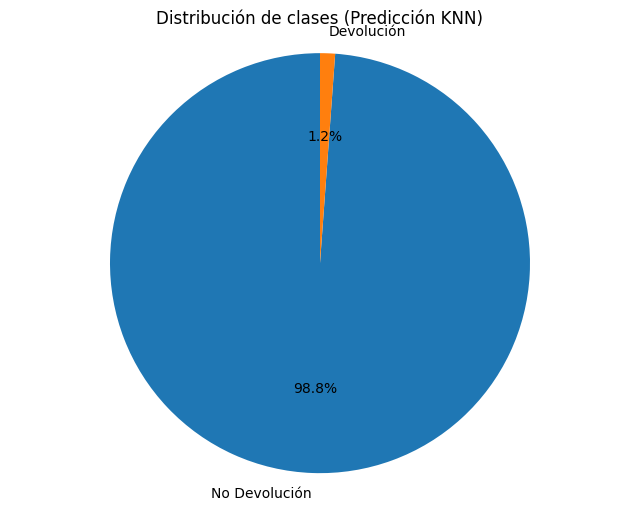

In [277]:
import matplotlib.pyplot as plt

# Calcular la distribución de clases en las predicciones del modelo KNN
prediccion_counts = df_predicciones_knn['Predicción KNN'].value_counts()

# Definir etiquetas personalizadas para los valores
labels = ['No Devolución', 'Devolución']

# Crear un gráfico de torta para las predicciones del modelo KNN
plt.figure(figsize=(8, 6))
plt.pie(prediccion_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de clases (Predicción KNN)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
